# Building QEMSCAN Hyperspectral cube

The following notebook goes through the process of building a 3D hyperspectral cube from exported QEMSCAN CSV file to make it more useful. The function used in this process is part of the "utils".

In [1]:
import pandas as pd
import GPyEDS
import numpy as np
import matplotlib.pyplot as plt
from GPyEDS import utils

## Load in data partially for inspection

Here we can look at what's actually in the CSV file and what information we need to do. The file can also just be loaded in full, but beware the large memory requirement; most of the data in the CSV will not be used.

In [2]:
data  = pd.read_csv("example_data.csv", nrows = 10, header = 1)
data.head()

,X(um),Y(um),X,Y,Field ID,Particle ID,Mineral ID,Mineral Name,File Name,BSE,...,Po,At,Rn,Fr,Ra,Ac,Th,Pa,U,Unnamed: 133
0,22621.96337,1999,1,0,1,662992335,502,Unclassified,NaN,45.40856,...,0,0,0,0,0,0,0,0,0.0,NaN
1,22641.89011,1999,3,0,1,662992335,502,Unclassified,NaN,45.18677,...,0,0,0,0,0,0,0,0,0.0,NaN
2,22631.92674,1999,2,0,1,662992335,502,Unclassified,NaN,44.96887,...,0,0,0,0,0,0,0,0,0.0,NaN
3,22661.81685,1999,5,0,1,662992335,502,Unclassified,NaN,44.85992,...,0,0,0,0,0,0,0,0,0.0,NaN
4,22671.78022,1999,6,0,1,662992335,502,Unclassified,NaN,44.31517,...,0,0,0,0,0,0,0,0,0.0,NaN


Inspect columns:

In [3]:
data.columns.to_numpy()

array(['X(um)', 'Y(um)', 'X', 'Y', 'Field ID', 'Particle ID',
       'Mineral ID', 'Mineral Name', 'File Name', 'BSE', 'Count Rate',
       'Live Time', 'Counts', 'SAE Confidence', 'Xray Index', 'C', 'O',
       'F', 'Na', 'Mg', 'Al', 'Si', 'P', 'S', 'Cl', 'K', 'Ca', 'Ti', 'V',
       'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'As', 'Ag', 'Sn', 'Sb',
       'Ba', 'Ce', 'W', 'Au', 'Pb', 'Bi', 'C.1', 'N', 'O.1', 'F.1', 'Ne',
       'Na.1', 'Mg.1', 'Al.1', 'Si.1', 'P.1', 'S.1', 'Cl.1', 'Ar', 'K.1',
       'Ca.1', 'Sc', 'Ti.1', 'V.1', 'Cr.1', 'Mn.1', 'Fe.1', 'Co.1',
       'Ni.1', 'Cu.1', 'Zn.1', 'Ga', 'Ge', 'As.1', 'Se', 'Br', 'Kr', 'Rb',
       'Sr', 'Y.1', 'Zr', 'Nb', 'Mo', 'Tc', 'Ru', 'Rh', 'Pd', 'Ag.1',
       'Cd', 'In', 'Sn.1', 'Sb.1', 'Te', 'I', 'Xe', 'Cs', 'Ba.1', 'La',
       'Ce.1', 'Pr', 'Nd', 'Pm', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er',
       'Tm', 'Yb', 'Lu', 'Hf', 'Ta', 'W.1', 'Re', 'Os', 'Ir', 'Pt',
       'Au.1', 'Hg', 'Tl', 'Pb.1', 'Bi.1', 'Po', 'At', 'Rn', 'Fr', 'Ra',

## Load in wanted data only

In [4]:
#only load in desired columns, note for this part make sure only columns that contain numbers are loaded in as all apart from X and Y will be turned into the hypercube
props = ["X", "Y","Ca", "Si", "Fe", "Mg", "O"]
data_wanted = pd.read_csv("example_data.csv", header = 1, usecols=props)

In [5]:
data_wanted.head()

,X,Y,O,Mg,Si,Ca,Fe
0,1,0,50.299999,0.000000,393.699066,59.5,0.0
1,3,0,49.299999,25.105440,407.550262,53.0,0.0
2,2,0,44.799999,25.808640,415.219025,49.0,0.0
3,5,0,56.299999,21.503839,390.898315,52.5,0.0
4,6,0,47.299999,34.461040,384.661102,62.5,0.0


## Build Map

In [6]:
conc_map, data_mask = utils.build_conc_map(data_wanted)

Starting to build data-cube.
Progress: 10%
Progress: 20%
Progress: 30%
Progress: 40%
Progress: 50%
Progress: 60%
Progress: 70%
Progress: 80%
Progress: 90%
Progress: 100%


## Inspect

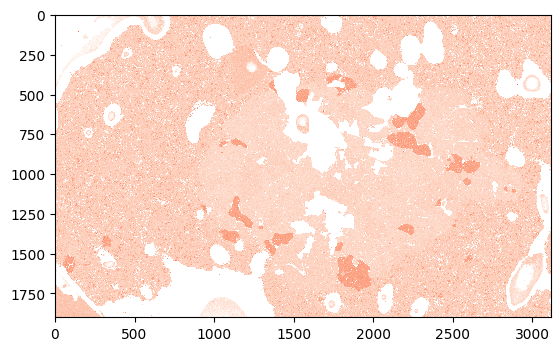

In [7]:
plt.imshow(conc_map[:,:,0], interpolation="none", cmap = "Reds")

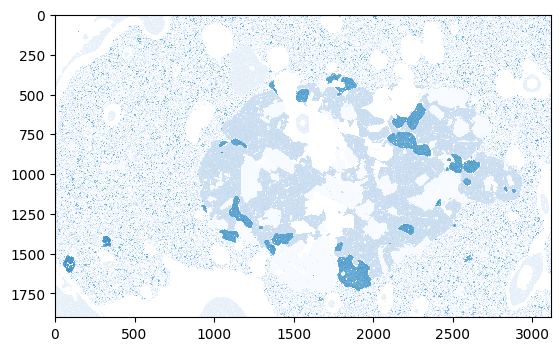

In [8]:
plt.imshow(conc_map[:,:,1], interpolation="none", cmap = "Blues")

## Save

Can use any way to save it really, here two are shown using either NumPy directly or using native Python pickle format:

In [9]:
np.savez("conc_map.npz", conc_map = conc_map, data_mask = data_mask, elements = props[2:])

In [ ]:
to_save = { "conc_map": conc_map, "data_mask": data_mask, "elements": props[2:]}
import pickle
with open("conc_map.pkl", "wb") as f:
    pickle.dump(to_save, f)